In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [3]:
data=pd.read_csv("f:/a.txt",encoding='ISO-8859-14')   

C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()     

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [5]:
data.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], 1, inplace=True)  

In [6]:
data.head()     

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375


In [7]:
cols = data.columns.tolist()
for entry in np.arange(0,len(cols),1):
    cols[entry] = cols[entry].rstrip()     #strip whitespace characters
data.columns = cols
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 13 columns):
ID               323750 non-null int64
name             323746 non-null object
category         323745 non-null object
main_category    323750 non-null object
currency         323750 non-null object
deadline         323750 non-null object
goal             323750 non-null object
launched         323750 non-null object
pledged          323750 non-null object
state            323750 non-null object
backers          323750 non-null object
country          323750 non-null object
usd pledged      319960 non-null object
dtypes: int64(1), object(12)
memory usage: 32.1+ MB


In [9]:
data[['goal', 'pledged', 'usd pledged', 'backers']] = data[['goal', 'pledged', 'usd pledged', 'backers']].apply(pd.to_numeric, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 13 columns):
ID               323750 non-null int64
name             323746 non-null object
category         323745 non-null object
main_category    323750 non-null object
currency         323750 non-null object
deadline         323750 non-null object
goal             323118 non-null float64
launched         323750 non-null object
pledged          323126 non-null float64
state            323750 non-null object
backers          323127 non-null float64
country          323750 non-null object
usd pledged      319337 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 32.1+ MB


In [20]:
data.state   #to see what are the possible states

0             failed
1             failed
2             failed
3           canceled
4         successful
5         successful
6             failed
7           canceled
8           canceled
9             failed
10        successful
11            failed
12            failed
13            failed
14            failed
15            failed
16        successful
17            failed
18        successful
19            failed
20            failed
21        successful
22        successful
23            failed
24        successful
25        successful
26            failed
27        successful
28        successful
29            failed
             ...    
323720      canceled
323721        failed
323722        failed
323723    successful
323724    successful
323725        failed
323726        failed
323727        failed
323728        failed
323729    successful
323730        failed
323731    successful
323732      canceled
323733        failed
323734      canceled
323735    successful
323736       

In [10]:
data['state'].value_counts() < 100
acc_states = ['failed', 'successful', 'live', 'undefined', 'suspended'] #states we will be needing for futher analysis

In [11]:
acc_data = data[data['state'].isin(acc_states)]

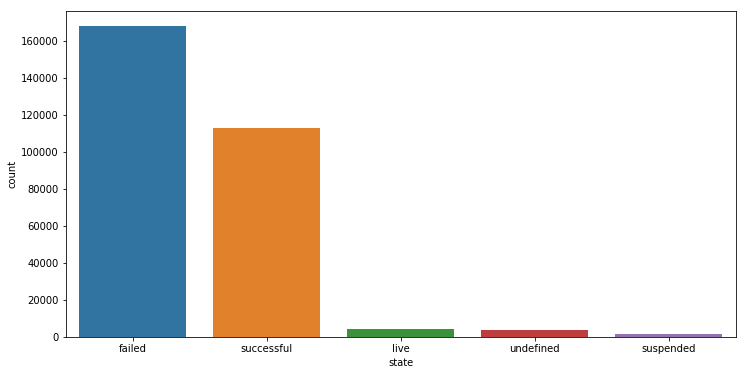

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='state', data=acc_data) 


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

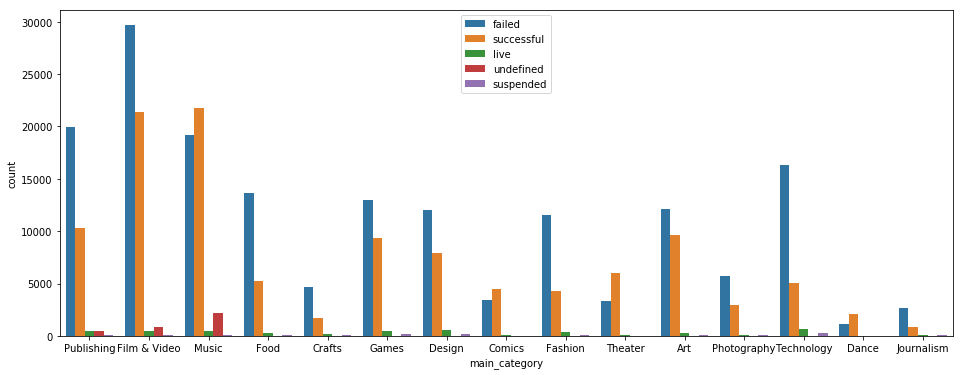

In [18]:
plt.figure(figsize=(16,6))
sns.countplot(x='main_category', data=acc_data, hue= 'state')
plt.legend(loc='upper center')
plt.tight_layout

In [21]:
successfaildf = acc_data[(acc_data['state'] == 'successful') | (acc_data['state'] == 'failed')]

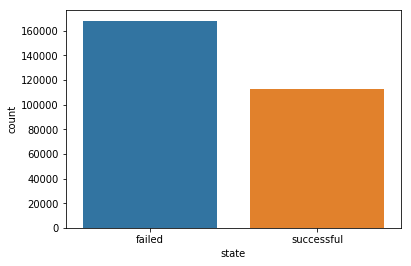

In [22]:
sns.countplot(x='state', data=successfaildf)

In [39]:
successfaildf[['deadline', 'launched']] = successfaildf[['deadline', 'launched']].apply(pd.to_datetime, errors='coerce', infer_datetime_format=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [40]:
import datetime
successfaildf['length'] = successfaildf['deadline'] - successfaildf['launched']    #for fining the days it took to complete

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
def daysfinder(timedelta):    
    numdays = timedelta.days   
    return numdays
successfaildf['length'] = successfaildf['length'].apply(lambda x: daysfinder(x))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [45]:
successfaildf['main_category'].unique()   #category of succesful projects

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Crafts', 'Games',
       'Design', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [46]:
category_dict = {
    'Publishing':1,
    'Film & Video':2,                 #replacing the values
    'Music':3,
    'Food':4,
    'Crafts':5,
    'Games':6,
    'Design':7,
    'Comics':8,
    'Fashion':9,
    'Theater':10,
    'Art':11,
    'Photography':12,
    'Technology':13,
    'Dance':14,
    'Journalism':15
}

successfaildf['main_category'] = successfaildf['main_category'].replace(category_dict)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [47]:
features = ['main_category', 'goal', 'backers', 'length']
target = ['state']                                               #data that we will use for working

In [57]:
from sklearn.model_selection import train_test_split
X = successfaildf[features]
y = successfaildf[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression
algo = LogisticRegression()
algo.fit(X_train, y_train)
algo.score(X_test, y_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9020297892005261

In [63]:
pred=algo.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))


             precision    recall  f1-score   support

     failed       0.89      0.95      0.92     16775
 successful       0.92      0.83      0.87     11356

avg / total       0.90      0.90      0.90     28131



In [66]:
#print(confusion_matrix(y_test, pred))  for overall

[[15994   781]
 [ 1975  9381]]
